In this project I analyse Twitter data to identify characteristics of hashtags produced by automated or organized sources. 

I collected tweets using the Twitter API for three months at the end of 2013. I then stripped hashtags from these tweets and concentrated on the time behaviour hashtags mentioned at least 1000 times in this period. 

Originally I concentrated on Turkish hashtags because at the time they were frequently appearing in the world wide trending topics section. But there seems to be other hashtags with similar behaviour. 

Recently similar arguments were made for tweets published during the US elections. Kollanyi et al 2016 tries to identify bots on 3 days of hashtag data around the third presedential debate.

In [1]:
from __future__ import unicode_literals
from __future__ import division
from collections import defaultdict
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from wordcloud import WordCloud
import os
import json

os.chdir('/Users/deniz/Research/Organized-Hashtags')
%matplotlib notebook
plt.style.use('ggplot')

In [2]:
def open_data(filename):
    with open(filename) as f:
        ct = json.load(f) 
    return ct
hashtag_time = open_data('/Users/deniz/Research/Organized-Hashtags/merged_g1000.json')
interArrivalTimes = open_data('/Users/deniz/Research/Organized-Hashtags/interArrivalTimes.json')

df_final1 = pd.read_pickle('/Users/deniz/Research/Organized-Hashtags/NumberMentionsPerMinute.pkl') 
df_final2 = pd.read_pickle('/Users/deniz/Research/Organized-Hashtags/NumberMentionsPerMinute.pkl') 

df_final = df_final1.join(df_final2)

<IPython.core.display.Javascript object>


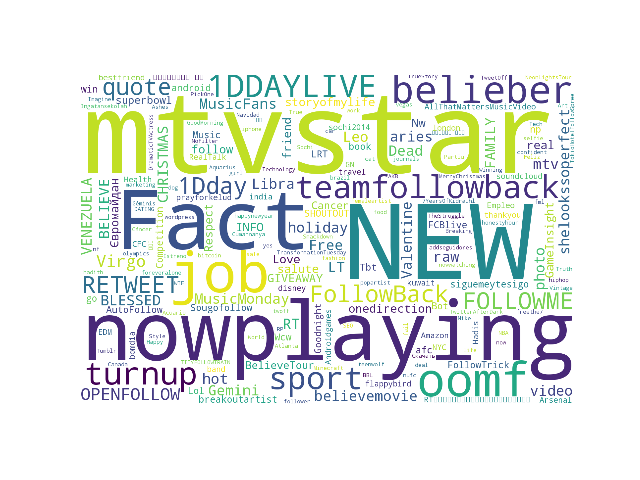

(-0.5, 1499.5, 999.5, -0.5)

In [3]:
text = ' '.join(df_final.columns)
wordcloud = WordCloud(width=1500,height=1000,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

I have looked at the 3488 hashtags and separated Turkish ones by hand:

In [4]:
all_tr = []
with open('/Users/deniz/Desktop/twitter/all_tr.txt') as f:
    for line in f:
        all_tr.append(int(line))
all_tr.append(1813)
all_tr.append(353)
all_tr.append(480)
all_tr.sort()
        
tr = [df_final.columns[i] for i in range(len(df_final.columns)) if i+1 in all_tr]      
non_tr = [df_final.columns[i] for i in range(len(df_final.columns)) if i+1 not in all_tr and i!=0]

In [5]:
print 'total tweets with hashtags in our dataset: %2.3g million' % (df_final.sum().sum()/10**6)
print 'total tweets from Turkey: %3.4g thousand' %(df_final[tr].sum().sum()/10**3)
print 'proportion: %.2g %%'  % (df_final[tr].sum().sum()/(df_final.sum().sum()*1.0)*100)

total tweets with hashtags in our dataset: 19 million
total tweets from Turkey: 385 thousand
proportion: 2 %


<IPython.core.display.Javascript object>


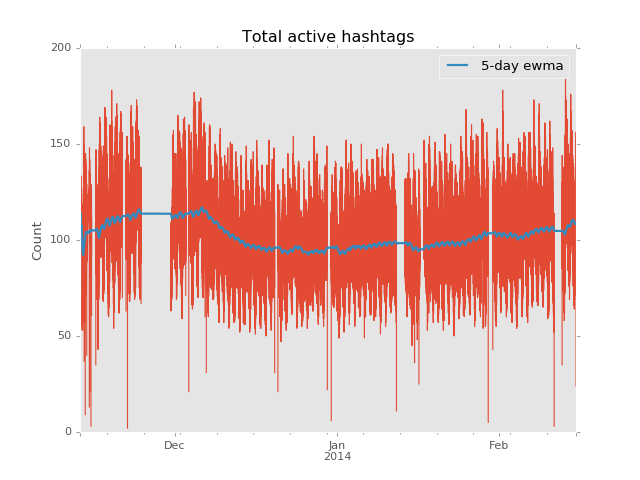

In [6]:
x = (df_final>0).sum(axis=1,skipna=True)
x[x==0]=np.NaN
plt.figure()
x.plot(label='')
x.ewm(ignore_na=True,span=7200,min_periods=0,adjust=True).mean().plot(linewidth=2,label='5-day ewma')
plt.ylabel('Count')
plt.title('Total active hashtags')
plt.grid()
plt.legend()

We have collected tweets from November 2013 to February 2014. There were some interruptions mainly during 24-30 December and some 1-2 day periods. But in general around 100 hashtags from our dataset is mentioned daily.

In [7]:
hashtag_count = defaultdict(int)
for item in hashtag_time:
    hashtag_count[item] = len(hashtag_time[item])
max_keys = sorted(hashtag_count, key=hashtag_count.get, reverse=True)

The following plot shows some of the most used Turkish political hashtags getting active each day, one after another.

<IPython.core.display.Javascript object>


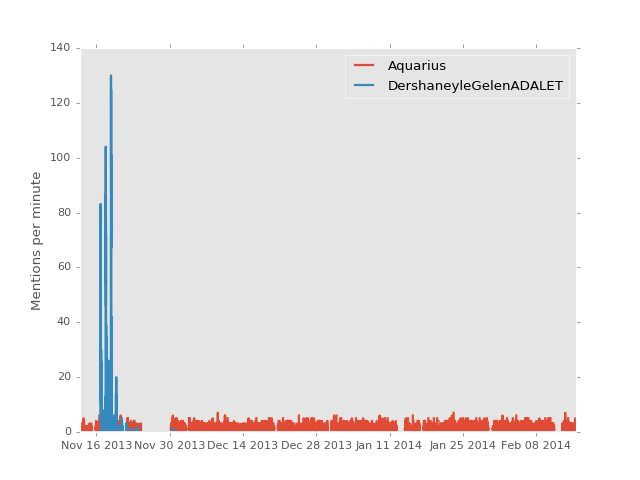

<IPython.core.display.Javascript object>


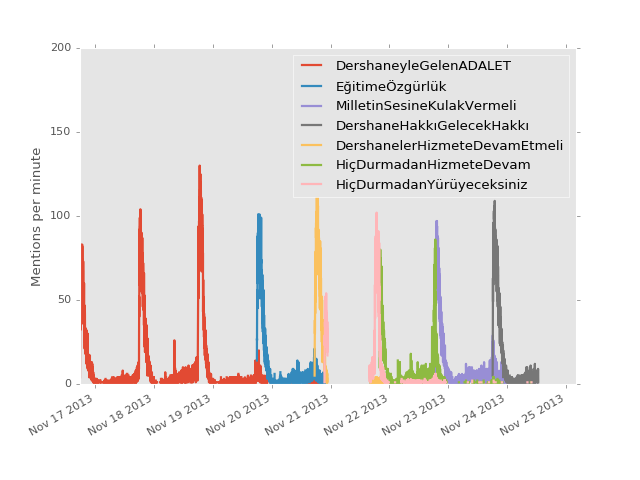

In [14]:
plt.figure()
for i in [49,50]:
    plt.plot(df_final[max_keys[i]],label=max_keys[i],linewidth=2)
plt.grid()
plt.legend()
plt.ylabel('Mentions per minute')




fig, ax = plt.subplots()
for i in [50, 155, 156, 163, 180, 198, 204]:
    plt.plot(df_final[max_keys[i]],label=max_keys[i],linewidth=2)
plt.grid()
plt.legend()
plt.ylabel('Mentions per minute')
plt.xlim([735188.7493055556, 735197.16527777782])
plt.ylim([0,200])
fig.autofmt_xdate()

Here are two hashtags, with similar total mentions count, but different behaviour over time. In particular, the Turkish one is much more bursty.

<IPython.core.display.Javascript object>


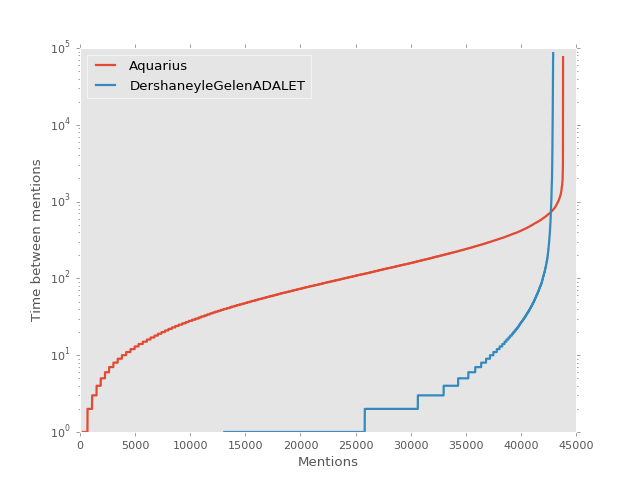

In [15]:
plt.figure()
for i in [49,50]:
    plt.semilogy(interArrivalTimes[max_keys[i]],label=max_keys[i],linewidth=2)
plt.grid()
plt.legend(loc=2)
plt.ylabel('Time between mentions')
plt.xlabel('Mentions')


The Turkish hashtag has almost 60% of its occurences within 1 seconds or less.

I defined a metric to capture this: Mean of log10(time between mentions)

In [10]:
meanLog10_InterArrival = []

for i in range(len(interArrivalTimes)):
     cc = [ii+1 for ii in interArrivalTimes[max_keys[i]]]
     meanLog10_InterArrival.append(pd.DataFrame(np.log10(cc)).mean().values[0])

<IPython.core.display.Javascript object>


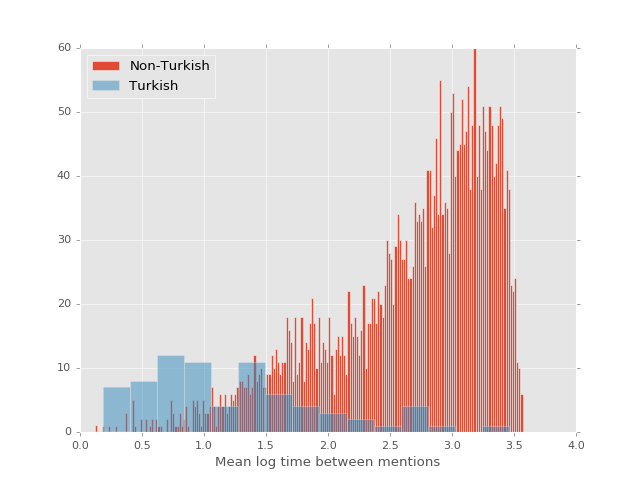

In [11]:
ix = []
for i in tr:
    ix.append([j for j in range(len(max_keys)) if max_keys[j]==i][0])
   
ix_nontr = list(set(range(len(max_keys)))-set(ix))

plt.figure()
plt.hist([meanLog10_InterArrival[ix_nontr[i]] for i in range(len(ix_nontr))],bins=200, label='Non-Turkish')
plt.hist([meanLog10_InterArrival[ix[i]] for i in range(len(ix))],bins=15,label='Turkish', alpha=0.5)
plt.xlabel('Mean log time between mentions')
plt.legend(loc=2)

Let's look at the hashtags with lowest mean log time between mentions:

In [12]:
[max_keys[i] for i in range(3488) if meanLog10_InterArrival[i]<.7]

[u'\u063a\u0631\u062f_\u0628\u0630\u0643\u0631_\u0627\u0644\u0644\u0647',
 u'mtvstars',
 u'1DDayLive',
 u'EsuranceSave30',
 u'EXADirectioners',
 u'DershaneyleGelenADALET',
 u'ExaBeliebers',
 u'BellLetsTalk',
 u'GRAMMYs',
 u'VoiceSave',
 u'E\u011fitime\xd6zg\xfcrl\xfck',
 u'MilletinSesineKulakVermeli',
 u'DershaneHakk\u0131GelecekHakk\u0131',
 u'DershanelerHizmeteDevamEtmeli',
 u'1DFOLLOWSPREE',
 u'NMA',
 u'Camiaya\u0130ftiraYolsuzlu\u011fu\xd6rtmez',
 u'BatimGanteng',
 u'Hi\xe7DurmadanHizmeteDevam',
 u'Hi\xe7DurmadanY\xfcr\xfcyeceksiniz',
 u'HagiSedotAbuKelud',
 u'MAMA2013',
 u'TwitterFuckedUpFollowParty',
 u'SOTU',
 u'YolsuzlukLobisi',
 u'JAMES900k',
 u'1DDAYLIVE',
 u'1DDayFollowSpree',
 u'voicesave',
 u'TokioHotelFollowSpree',
 u'UmursmzAdamileTkibKeyfi',
 u'HappyValentines1DFamily',
 u'SkipTo900K',
 u'JoshUJValentineFollow',
 u'sosyalhizmetlerim',
 u'B\xfcy\xfckUstaVazoyuK\u0131rma',
 u'GelenekselSivasG\xfcnleri',
 u'HerEve\u0130\u015faretDili',
 u'KadirTopba\u015f',
 u'Tolga\xd6\u0

In [13]:
p =.7
print 'Proportion of Turkish hashtags in this sample : %2.3g %%' % (len([max_keys[i] for i in range(3488) if meanLog10_InterArrival[i]<p and max_keys[i] in tr])/len([max_keys[i] for i in range(3488) if meanLog10_InterArrival[i]<p])*100.0)

Proportion of Turkish hashtags in this sample : 40.5 %
